# PDSeI - Redes Neuronales convolucionales

# Integrantes:

1. Oliva Burgos Nelson

2. Simeon Acero Jhoser Brayan

3. Ramos Rojas Luis David


Base de datos: https://www.kaggle.com/datasets/datamunge/sign-language-mnist

# Conexión con kaggle

# Instalaciones previas

In [ ]:
!pip install -q kaggle
!pip install -q scikeras

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nelsonolivaburgos","key":"9fe8e9e5e18549e0399ce0aecc7561d0"}'}

# Descargar la base de datos

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d datamunge/sign-language-mnist
!unzip sign-language-mnist.zip

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
100% 62.6M/62.6M [00:03<00:00, 24.2MB/s]
100% 62.6M/62.6M [00:03<00:00, 16.9MB/s]
Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


# Lectura de datos

In [ ]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

In [ ]:
print(train_df.keys())

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [ ]:
# Elementos por clase

class_counts = train_df['label'].value_counts()
print(class_counts)

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64


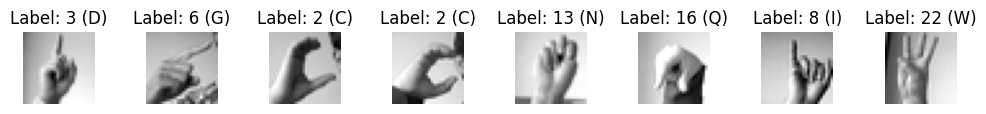

In [ ]:
import matplotlib.pyplot as plt

label_mapping = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'J',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
    25: 'Z'
}

def plot_images(data, labels, num=8):
    fig, axes = plt.subplots(1, num, figsize=(10, 2))
    fig.tight_layout()

    for i in range(num):
        ax = axes[i]
        ax.imshow(data[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'Label: {labels[i]} ({label_mapping[labels[i]]})')
        ax.axis('off')

    plt.show()

plot_images(train_df.iloc[:, 1:].values, train_df['label'].values)

# Transformación de datos

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

batch_size = 32

X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df['label'].values

X_val = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_val = test_df['label'].values

# Data Augmentation

In [ ]:
datagen_train = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

train_generator = datagen_train.flow(
    X_train,
    y_train,
    batch_size=batch_size)

datagen_val = ImageDataGenerator()
val_generator = datagen_val.flow(X_val, y_val, batch_size=batch_size)



```
1. ¿Qué es el data augmentation y cómo puede beneficiar el entrenamiento de una CNN?

Crea nuevas muestras a partir de muestras ya existentes a partir de filtros simples como voltear la imagen horizontalmente (horizontal_flip=True), distorcionar un poco la altura o anchura (width/height_shift_range=0.1), la rotación (rotation_range), etc. Sirve para optimizar el entrenamiento y generalizar el tipo de muestras dependiendo de las libertades que nos podemos tomar al momento de establecer los límites de las variaciones.

2. ¿Por qué es importante normalizar los datos de entrada y qué impacto tiene en el rendimiento del modelo?

Sirve para limpiar la información de las muestras, escalandolas de 0 a 1, así optimizando el rendimiento del modelo.

```

# Creación del modelo

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,954 (519.35 KB)

 Trainable params: 132,954 (519.35 KB)

 Non-trainable params: 0 (0.00 B)



```
1. ¿Qué función cumplen las capas Conv2D y MaxPooling2D en una CNN?
Conv2D multiplica un filtro por toda la muestra, sumando los pixeles vecinos. Reduciendo el tamaño de la imagen y simplificandola.
MaxPooling2D. Elige el valor máximo de una malla de los valores tras una activación relu.
2. ¿Qué es el Dropout y cómo ayuda a prevenir el sobreajuste en redes neuronales?
Randomiza el un valor de 0 en los pixeles de salida de algunas neuronas, variando el entrenamiento entre cada época, mejorando la habilidad para generalizar y por ende previniendo el overfitting.
3. ¿Por qué se utiliza la función de activación ReLU en las capas ocultas y cuáles son sus ventajas?
Se utiliza para transformar los valores negativos en estas capas a 0, simplificando y conduce a una convergencia más rápida durante el entrenamiento. Además creando una combinación no lineal de la entrada original.
4. ¿Qué hace la función de activación softmax en la capa de salida y en qué tipo de problemas se utiliza comúnmente?
Softmax transforma la última capa oculta, clasificando en vectores de probabilidad que suman 1. Es útil para clasificación de imágenes donde hay más de 2 clases posibles (Como este caso de letras del abecedario en lenguaje de señas).
5. ¿Qué es el tamaño del filtro (filter size) en una capa convolucional y cómo impacta la calidad de las características extraídas?
El tamaño del filtro depende de la complejidad de las características, un filtro más pequeño puede detectar características específicas, mientra que un filtro "grande" es más conveniente para detectar características más generales o abstractas.
6. ¿Qué efecto tiene un stride mayor que 1 en la resolución de la salida de una capa convolucional?
El filtro se saltará pixeles al momento de la convolución, lo que reduce la resolución de la imagen pues salta partes de la imagen y obviamente la imagen también será más pequeña.

7. ¿Cómo se debe seleccionar el tamaño del filtro y el stride para optimizar el balance entre la extracción de características y la complejidad del modelo?
Como ya explicado, un tamaño de filtro menor para características pequeñas y específicas, y un filtro mayor para caracerísticas generales o aún mayor para abstractas como texto. Mientras que un stride de 1 es la norma, mientras que un stride mayor a 1 para reducir el tamaño y capturar características a gran escala.

```



# Terminación anticipada y Checkpoints

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')

In [ ]:
class CustomModelCheckpoint(ModelCheckpoint):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.best_val_accuracy = -float('inf')

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get('val_accuracy')

        if current_val_accuracy and current_val_accuracy > self.best_val_accuracy:
            self.best_val_accuracy = current_val_accuracy
            print(f" Modelo guardado época {epoch + 1} con exactitud: {current_val_accuracy:.4f}")

        super().on_epoch_end(epoch, logs)

custom_model_checkpoint = CustomModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')



```
1. ¿Qué es el EarlyStopping y cómo contribuye a mejorar el proceso de entrenamiento de un modelo?
Para el entrenamiento cuando el error comieza a cercer y previene el sobreajuste.
2. ¿Cuál es la función de ModelCheckpoint y por qué es útil guardar el mejor modelo durante el entrenamiento?
Guarda el progreso del entrenamiento en momentos específicos del aprendizaje, es útil para guardar el modelo y regresar a anteriores modelos con mejor error. Como hecho en el código.
```



# Entrenamiento

In [ ]:
epochs = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    # callbacks=[early_stopping, model_checkpoint]
    callbacks=[early_stopping, custom_model_checkpoint]
)

Epoch 1/10
857/858 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3046 - loss: 2.1344 Modelo guardado época 1 con exactitud: 0.6599
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.3047 - loss: 2.1338 - val_accuracy: 0.6599 - val_loss: 1.0684
Epoch 2/10
856/858 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5419 - loss: 1.3223 Modelo guardado época 2 con exactitud: 0.8104
858/858 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.5420 - loss: 1.3220 - val_accuracy: 0.8104 - val_loss: 0.6231
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.6586 - loss: 0.9833 - val_accuracy: 0.8009 - val_loss: 0.5108
Epoch 4/10
851/858 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7100 - loss: 0.8227 Modelo guardado época 4 con exactitud: 0.8756
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.7101 - loss: 0.8223 - val_accuracy: 0.8756 - val_loss: 0.3641
Epoch 5/10
850/858 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7526 - loss: 0.7057 Modelo guardado época 5 con



```
1. ¿Qué significa el parámetro epochs y cómo afecta al entrenamiento de un modelo?
Es la cantidad de épocas en las que se realizará el entrenamiento, y a mayor número de épocas, con el adecuado EarlyStopping y ModelCheckpoint, aumentará la exactitud en cada época.
2. ¿Cuál es la diferencia entre train_generator y val_generator en el contexto del entrenamiento y la validación del modelo?
El train_generator genera datos durante todo el proceso de aprendizaje de entrenamiento y el val_generator genera lotes con los datos de validación para el dicho entrenamiento.
```



# Predicciones

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


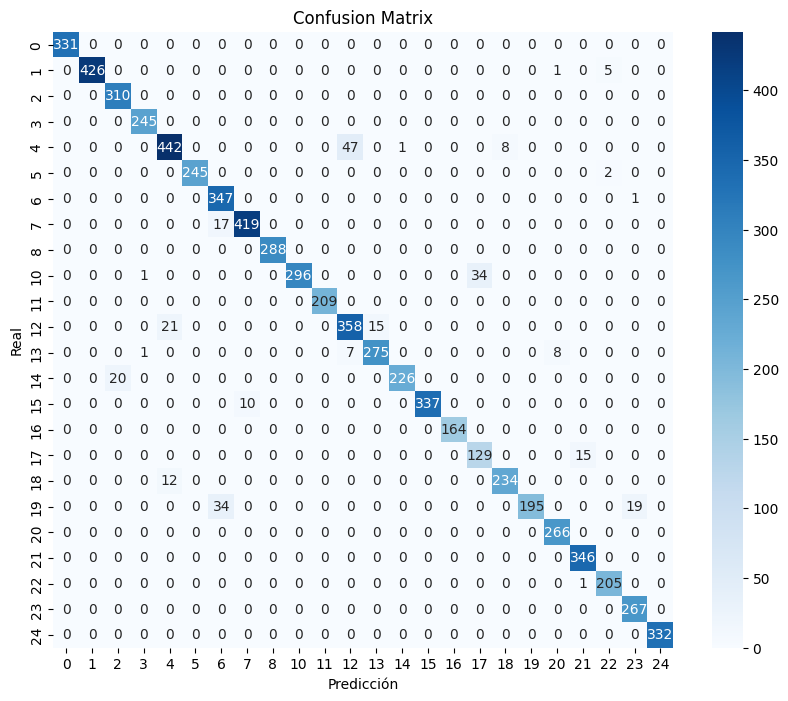

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      0.99      0.99       432
          10       0.94      1.00      0.97       310
          11       0.99      1.00      1.00       245
          12       0.93      0.89      0.91       498
          13       1.00      0.99      1.00       247
          14       0.87      1.00      0.93       348
          15       0.98      0.96      0.97       436
          16       1.00      1.00      1.00       288
          17       1.00      0.89      0.94       331
          18       1.00      1.00      1.00       209
          19       0.87      0.91      0.89       394
           2       0.95      0.95      0.95       291
          20       1.00      0.92      0.96       246
          21       1.00      0.97      0.99       347
          22       1.00      1.00      1.00       164
          23       0.79      0.90      0.84       144
          24       0.97    

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

best_model = load_model('best_model.keras')

X_test = test_df.iloc[:, 1:].values.astype('float32') / 255.0
y_test = test_df['label'].values

X_test = X_test.reshape(-1, 28, 28, 1)

predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, predicted_classes, target_names=np.unique(y_test.astype(str))))

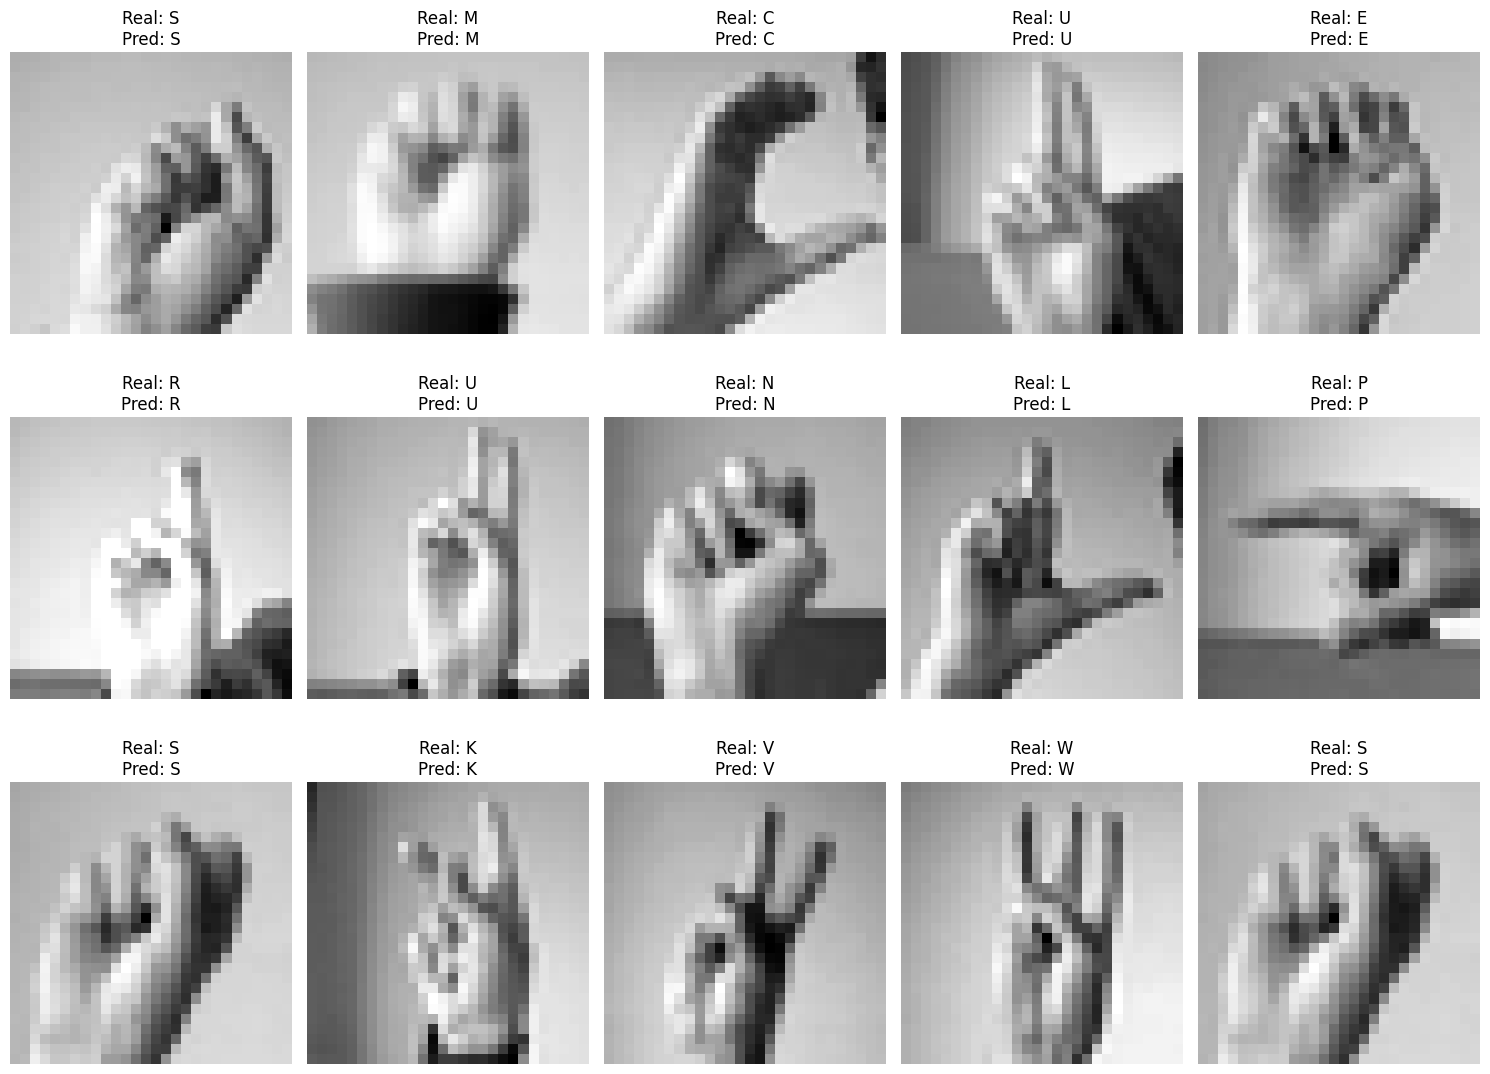

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_images_to_show = 15
indices = np.random.choice(len(X_test), num_images_to_show, replace=False)
images_per_row = 5

plt.figure(figsize=(15, 15))
for i, idx in enumerate(indices):
    plt.subplot(num_images_to_show // images_per_row + 1, images_per_row, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Real: {label_mapping[y_test[idx]]}\nPred: {label_mapping[predicted_classes[idx]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()



```
1. ¿Qué es el confusion_matrix y qué información proporciona sobre el rendimiento del modelo?
Es una matriz con los falsos negativos y positivos, verdaderos negativos y positivos, representado a través de núemros con la cantidad de coincidencias entre los datos del resultado del entrenamiento (Predicción) y los datos de validación (Reales). A partir de calculos simples se pueden obtener los parámetros de exactitud, sensiblidad, precisión, precisión negativa y espicificidad.
2. ¿Cómo se interpreta el classification_report y qué métricas se incluyen en él?
Presición, Recall o Sensibilidad (Porción de positivos reales identificados) y F1-score (Media entre la presición y el recall)
3. ¿Por qué es importante utilizar el conjunto de prueba (X_test y y_test) para evaluar el modelo?
Para una comprobación rápida para conocer a rasgos generales la precisión de nuestro modelo. Y eventualmente evualuar si se requieren más epocas u otras medidas.
4. ¿Qué rol juega la función np.argmax en el proceso de obtención de clases predichas?
La función regresa el indice del valor máximo de una fila (axis=1) de datos, en este caso se usa para resaltar en donde hubo la mayor cantidad de predicciones y colorearlos del color adecuado.
5. ¿Qué información visual adicional proporciona un mapa de calor (heatmap) de la matriz de confusión?
En este caso, además de resaltar la diagonal principal, facilita la observación de donde ocurrieron la mayor cantidad de falsos negativos y positivos.
```



# Refinamiento

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='adam', **kwargs):
    dropout_rate = kwargs.get('dropout_rate', 0.5)
    model = Sequential([
        Input((28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(26, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from sklearn.model_selection import GridSearchCV

epochs = 1
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=32, verbose=0)

param_grid = {
    'model__optimizer': ['SGD', 'Adam'],
    'model__dropout_rate': [0.2, 0.5, 0.7]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(X_train, y_train)

print(f"Mejor: {grid_result.best_score_} usando {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Mejor: 0.8855940080618394 usando {'model__dropout_rate': 0.2, 'model__optimizer': 'Adam'}


In [ ]:
val_accuracy = grid_result.best_estimator_.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.8530395984383714




```
1. ¿Qué es GridSearchCV y cómo se utiliza para optimizar el rendimiento de un modelo?
Ayuda a encontrar la mejor combinación de hiperparámetros posibles (Número de capas ocultas, Número de neuronas por capa, Tasa de aprendizaje, Función de activación.) así no se encuentra la manera más eficiente de hallar el modelo más preciso, sin recurrir a salidas fáciles y poco optimizadas como simplemente auemtnar el número de epocas.
2. ¿Qué representan los parámetros en param_grid y por qué es importante ajustar el optimizador y la tasa de dropout?
Param_grid establece los hiperparámetros en los que se va a entrenar un model para determinar la mejor combinación, estos 2 hiperparámetros en específico son los mejores para, evitar el sobreajuste sin llegar a producir un error a drede en el caso del dropout, y el optimizador es el cesgo que detrmina la salida del modelo y ajusta los valores de los parámetros y cada tipo de optimización tiene un diferente valor de velocidad de convergencia.
3. ¿Qué significa el parámetro cv=3 en el contexto de la validación cruzada y cómo influye en la evaluación del modelo?
El parámetro cv es el número de folds en los que se va a dividir el grupo de datos de prueba para entrenarlos y ser evualuados para tener un rendimiento promedio de todos los folds.
Al aumentar el número de folds se aumenta la precisión por la mayor cantidad de interacciones para cada resultado, y por ende, aumenta el tiempo de calculo.
```

